In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
%matplotlib inline

# The Gamma Regression

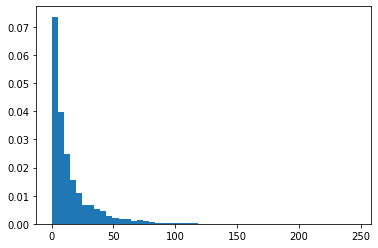

In [2]:
### Simulate the data
nobs =2500           # number of observations
np.random.seed (245)
x = 2 * np.random.uniform(low=0,high=1,size=nobs)
mu = 0.5 + 1.5 * x      # hier ist mu
shape =1.5              # shape parameter
scale=np.exp(mu)        # scale parameter  #Transformation von meinem Erwartungswert e^mu, damit ich y positiv sicherstellen kann

y = np.random.gamma(shape=shape , scale=scale , size=nobs) 

plot=plt.hist(y, 50, density=True)

#sieht Gamma Verteilung so aus: viele Werte auf 0 gesetzt, weil bei Versicherung kleine Schaden häufiger sind!

In [7]:
#nobs1=10
#np.random.seed (245)
#x1 = 2 * np.random.uniform(low=0,high=5,size=nobs1)
#print(x1)



[9.06853867 1.12530005 1.00300132 0.7620768  9.42521943 8.49352456
 9.51836297 1.81182671 9.01289407 3.85884386]


## Estimation via statsmodels

In [8]:
import statsmodels.api as sm
model = sm.GLM(y, sm.add_constant(x),
family=sm.families.Gamma(link = sm.genmod.families.links.log)).fit()  # Gamma Verteilung # log link function
print(model.summary())

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 2500
Model:                            GLM   Df Residuals:                     2498
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                         0.64297
Method:                          IRLS   Log-Likelihood:                -8362.3
Date:                Mon, 03 Feb 2020   Deviance:                       1842.6
Time:                        20:40:08   Pearson chi2:                 1.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9222      0.032     28.848      0.0

## Estimation via gradient descent

### The loss function

$$	l(\mu_i,\phi ;y_i) = - \frac{1}{\phi}\left( \frac{y}{\mu} - ln(\mu) + ln\left( \frac{1}{\phi}\right)  -ln(y) +ln\left(\Gamma(\phi)\right) \right) $$ 
with 
$$\mu_i =\exp\{\boldsymbol{x}_i \boldsymbol{\beta}\} $$

### The Gradient


$$\frac{\partial J(\beta)}{\partial \boldsymbol{\beta}}=-\frac{1}{\phi}\left( \boldsymbol{X}^T\frac{\boldsymbol{y}}{\exp(\boldsymbol{X\beta})} - {\boldsymbol{X}}\right)$$

In [9]:
X=np.c_[np.ones((nobs ,1)),x]
eta = 0.01
epochs = 1000
beta_gd = np.array ([[.1] ,[.1]])
beta_gd_list = np.array(np.zeros((epochs + 1)*2)). reshape(2,(epochs + 1))
beta_gd_list [:,0] = beta_gd.T
y=y.reshape(nobs ,1)



for e in range(0,epochs):
    gradient =1/np.var(y) * -(X.T@(y/np.exp(X @ beta_gd))- np.sum(X,axis=0). reshape (2,1)) #مثل القانون المكتوب فوق 
    beta_gd = beta_gd - eta * gradient.reshape(2,1)
    beta_gd_list[:,e+1] = beta_gd.T
print(beta_gd)


[[0.92220818]
 [1.47095649]]


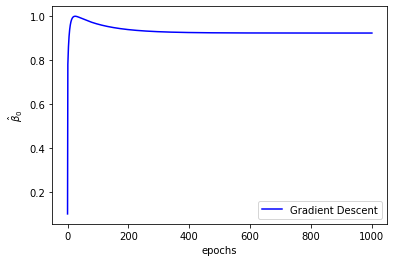

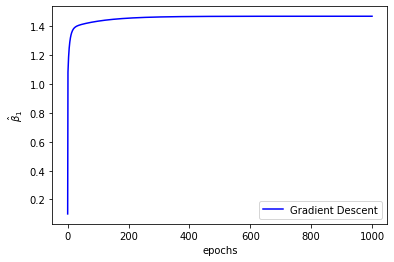

In [10]:
plt.plot(np.arange (0,1000 + 1),beta_gd_list [0][0:1001] , color = 'blue',
label = 'Gradient Descent')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel(r'$\hat{\beta}_0$')
plt.show()
plt.plot(np.arange (0,1000 + 1),beta_gd_list [1][0:1001] , color = 'blue',
label = 'Gradient Descent')
plt.legend()
plt.xlabel('epochs')
plt.ylabel(r'$\hat{\beta}_1$')
plt.show()

# The Beta Regression

### The log likelihood


$$f(y;\alpha,\beta) = \frac{1}{B(\alpha,\beta)} y^{\alpha-1} (1-y)^{\beta-1}$$
with
$$\alpha = \mu \phi \ \ \ \ \beta=(1-\mu)\phi$$

gives

$$l(\mu_i,\phi ;y_i)  = \log \left\{ \frac{\Gamma (\phi)}{\Gamma (\mu_i \phi)\Gamma ((1-\mu_i )\phi)}\right\}  
 + \, (\mu_i \phi - 1)\log \{ y_i\} + \, ((1-\mu_i )\phi  - 1)\log \{ 1-y_i\} $$
 
with

$$\mu =\frac{1}{1+\exp\{-\boldsymbol{x} \boldsymbol{\beta}\}}$$

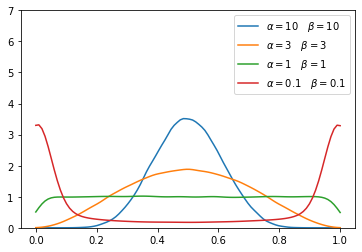

In [11]:
a1, b1 = 10, 10

rv1 = np.random.beta(a1, b1,100000) # a is alfa left shape parameter
                                    # b is beta right shape parameter
pdf1=scipy.stats.gaussian_kde(rv1)



a2, b2 = 3, 3

rv2 = np.random.beta(a2, b2,100000)
pdf2=scipy.stats.gaussian_kde(rv2)

a3, b3 = 1, 1

rv3 = np.random.beta(a3, b3,100000)
pdf3=scipy.stats.gaussian_kde(rv3)


a4, b4 = 0.1, 0.1

rv4 = np.random.beta(a4, b4,100000)
pdf4=scipy.stats.gaussian_kde(rv4)

x = np.linspace(0, 1, 100)

plt.plot(x, pdf1(x),label=(r'$ \alpha= $'+str(a1)+ '$\quad$'+r'$ \beta= $'+str(b1)))
plt.plot(x, pdf2(x),label=(r'$ \alpha= $'+str(a2)+ '$\quad$'+r'$ \beta= $'+str(b2)))
plt.plot(x, pdf3(x),label=(r'$ \alpha= $'+str(a3)+ '$\quad$'+r'$ \beta= $'+str(b3)))
plt.plot(x, pdf4(x),label=(r'$ \alpha= $'+str(a4)+ '$\quad$'+r'$ \beta= $'+str(b4)))
plt.ylim(0,7)
plt.legend()